In [ ]:
import sys
import os

print("Current working directory:", os.getcwd())

# Add the LNN directory to the Python path
lnn_path = os.path.abspath(os.path.join(os.getcwd(), "../../../../", "LNN"))

# Add the LNN path to sys.path
sys.path.append(lnn_path)
print(sys.path)

Current working directory: /home/kalki/Works/Capstone/LogicLurker/sqli_xss/backend/Contemplation
['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/kalki/Works/Capstone/LNN/.venv/lib/python3.12/site-packages', '/home/kalki/Works/Capstone/LogicLurker/sqli_xss/LNN', '/home/kalki/Works/Capstone/LogicLurker/LNN', '/home/kalki/Works/Capstone/LNN', '/home/kalki/Works/Capstone/LogicLurker/LNN']


In [4]:
from lnn import Predicates, Variable, Exists, Implies, Forall, Model, Fact, World, Iff, And, Or, Not

In [6]:
from lnn.constants import Direction, Loss


In [3]:
model = Model()

In [ ]:
# Atomic predicates for auth_bypass

basic_payload = Predicates('basic_payload')
bool_payload = Predicates('bool_payload')
concat_payload = Predicates('concat_payload')
encoded_payload = Predicates('encoded_payload')

status_3xx = Predicates('status_3xx')
status_2xx = Predicates('status_2xx')
session_cookie_set = Predicates('session_cookie_set')
success_body = Predicates('success_body')
db_error_body = Predicates('db_error_body')
status_5xx = Predicates('status_5xx')

status_4xx = Predicates('status_4xx')   
fail_body = Predicates('fail_body')
no_session_cookie = Predicates('no_session_cookie')

# Atomic predicates for union_based_sqli
order_by_payload = Predicates('order_by_payload')
union_payload = Predicates('union_payload')

status_200 = Predicates('status_200')
response_size_changed = Predicates('response_size_changed')
db_strings_found = Predicates('db_strings_found')
position_marker_found = Predicates('position_marker_found')

sql_error = Predicates('sql_error')
order_by_error = Predicates('order_by_error')

# Atomic predicates for error_based_sqli
status_500 = Predicates('status_500')
db_error_mysql = Predicates('db_error_mysql')
db_error_mssql = Predicates('db_error_mssql')
db_error_pgsql = Predicates('db_error_pgsql')
data_leaked = Predicates('data_leaked')

# Atomic predicates for boolean_blind_sqli

bool_content_payload = Predicates('bool_content_payload')
bool_length_payload = Predicates('bool_length_payload')

true_condition_size = Predicates('true_condition_size')
false_condition_size = Predicates('false_condition_size')
true_pattern_found = Predicates('true_pattern_found')
false_pattern_found = Predicates('false_pattern_found')


# Atomic predicates for reflected_xss
xss_basic_payload = Predicates('xss_basic_payload')
xss_obfuscated_payload = Predicates('xss_obfuscated_payload')
xss_context_payload = Predicates('xss_context_payload')

status_200_xss = Predicates('status_200_xss')
body_exact_match = Predicates('body_exact_match')
body_no_encoding = Predicates('body_no_encoding')
html_content_type = Predicates('html_content_type')
size_delta_detected = Predicates('size_delta_detected')

status_blocked_xss = Predicates('status_blocked_xss')
body_encoded_xss = Predicates('body_encoded_xss')
body_filtered_xss = Predicates('body_filtered_xss')

browser_alert_popup = Predicates('browser_alert_popup')
dom_modified = Predicates('dom_modified')


# Atomic predicates for stored_xss
stored_payload = Predicates('stored_payload')
session_hijack_payload = Predicates('session_hijack_payload')

status_ok_or_redirect = Predicates('status_ok_or_redirect')
payload_reflected = Predicates('payload_reflected')
persistence_marker_found = Predicates('persistence_marker_found')

status_blocked_stored = Predicates('status_blocked_stored')
body_reject_msg = Predicates('body_reject_msg')

browser_alert = Predicates('browser_alert')
outbound_to_attacker = Predicates('outbound_to_attacker')

# --- DOM XSS Rule ---

# Atomic predicates for dom_xss
dom_fragment_payload = Predicates('dom_fragment_payload')
dom_js_context_payload = Predicates('dom_js_context_payload')

status_200_dom = Predicates('status_200_dom')
dom_sinks_used = Predicates('dom_sinks_used')
no_sanitization = Predicates('no_sanitization')

safe_dom_constructs = Predicates('safe_dom_constructs')

url_fragment_executed = Predicates('url_fragment_executed')
no_js_errors = Predicates('no_js_errors')

# Atomic predicates for blind_xss
blind_oob_payload = Predicates('blind_oob_payload')
blind_delayed_payload = Predicates('blind_delayed_payload')

status_blind_ok = Predicates('status_blind_ok')
dns_lookup_detected = Predicates('dns_lookup_detected')
http_request_logged = Predicates('http_request_logged')

status_blind_no_oob = Predicates('status_blind_no_oob')
oob_absent = Predicates('oob_absent')

callback_received = Predicates('callback_received')
data_leak_observed = Predicates('data_leak_observed')

# Atomic predicates for polyglot_xss
polyglot_universal_payload = Predicates('polyglot_universal_payload')
polyglot_context_payload = Predicates('polyglot_context_payload')

status_200_polyglot = Predicates('status_200_polyglot')
html_context_break = Predicates('html_context_break')
js_context_break = Predicates('js_context_break')
css_context_break = Predicates('css_context_break')

multi_context_executed = Predicates('multi_context_executed')

status_400_polyglot = Predicates('status_400_polyglot')
invalid_char_msg = Predicates('invalid_char_msg')

all_contexts_vulnerable = Predicates('all_contexts_vulnerable')

In [5]:
x = Variable('x')

In [6]:
indicator_payload = Or(
    basic_payload(x),
    bool_payload(x),
    concat_payload(x),
    encoded_payload(x)
)

# Decompose: database_error
database_error = And(status_5xx(x), db_error_body(x))

# Decompose: success_login
success_login = Or(
    status_3xx(x),
    status_2xx(x),
    session_cookie_set(x),
    success_body(x),
    database_error
)

# Decompose: failure
failure = Or(
    And(status_2xx(x), fail_body(x)),
    status_4xx(x),
    no_session_cookie(x)
)

# Decompose: not_failure
not_failure = Not(failure)

auth_bypass = And(
    indicator_payload,
    success_login,
    not_failure
)

model.add_knowledge(auth_bypass)

In [7]:
# Decompose: payload_triggered
payload_triggered = Or(
    order_by_payload(x),
    union_payload(x)
)

# Decompose: content_change
content_change = Or(
    response_size_changed(x),
    db_strings_found(x),
    position_marker_found(x)
)

# Decompose: response_success
response_success = And(
    status_200(x),
    content_change
)

# Decompose: response_fail
response_fail = Or(
    sql_error(x),
    order_by_error(x)
)

union_based_sqli = And(
    payload_triggered,
    Or(response_success, response_fail)
)

model.add_knowledge(union_based_sqli)


In [8]:
db_error_signals = Or(
    db_error_mysql(x),
    db_error_mssql(x),
    db_error_pgsql(x)
)

# Decompose: error_content_found
error_content_found = Or(
    db_error_signals,
    data_leaked(x)
)

# Decompose: error_success
error_success = And(
    status_500(x),
    error_content_found
)


# Final rule: error_based_sqli
error_based_sqli = And(
    db_error_signals, 
    error_content_found,
    error_success  
)
model.add_knowledge(error_based_sqli)

In [9]:
# Decompose: payload_triggered_boolean
payload_triggered_boolean = Or(
    bool_content_payload(x),
    bool_length_payload(x)
)

# Decompose: content_diff
content_diff = Or(
    true_pattern_found(x),
    false_pattern_found(x)
)

# Decompose: size_diff
size_diff = Or(
    true_condition_size(x),
    false_condition_size(x)
)

# Final rule: boolean_blind_sqli
boolean_blind_sqli = And(
    payload_triggered_boolean,
    Or(size_diff, content_diff)
)

model.add_knowledge(boolean_blind_sqli)


In [10]:

# Decompose: xss_payloads
xss_payloads = Or(
    xss_basic_payload(x),
    xss_obfuscated_payload(x),
    xss_context_payload(x)
)

# Decompose: success_body_signals
success_body_signals = Or(
    body_exact_match(x),
    body_no_encoding(x)
)

# Decompose: success_response_indicators
success_response_indicators = Or(
    success_body_signals,
    html_content_type(x),
    size_delta_detected(x)
)

# Decompose: reflected_xss_success
reflected_xss_success = And(
    status_200_xss(x),
    success_response_indicators
)

# Decompose: reflected_xss_fail
reflected_xss_fail = Or(
    status_blocked_xss(x),
    body_encoded_xss(x),
    body_filtered_xss(x)
)

# Decompose: browser_verification
browser_verification = Or(
    browser_alert_popup(x),
    dom_modified(x)
)

# Final rule: reflected_xss
reflected_xss = And(
    xss_payloads,
    Or(reflected_xss_success, reflected_xss_fail, browser_verification)
)

model.add_knowledge(reflected_xss)


In [11]:
# Decompose: stored_xss_payloads
stored_xss_payloads = Or(
    stored_payload(x),
    session_hijack_payload(x)
)

# Decompose: stored_xss_success
stored_xss_success = And(
    status_ok_or_redirect(x),
    Or(payload_reflected(x), persistence_marker_found(x))
)

# Decompose: stored_xss_fail
stored_xss_fail = Or(
    status_blocked_stored(x),
    body_reject_msg(x)
)

# Decompose: stored_xss_verification
stored_xss_verification = Or(
    browser_alert(x),
    outbound_to_attacker(x)
)

# Final rule: stored_xss
stored_xss = And(
    stored_xss_payloads,
    Or(stored_xss_success, stored_xss_fail, stored_xss_verification)
)

model.add_knowledge(stored_xss)

In [12]:
# Decompose: dom_xss_payloads
dom_xss_payloads = Or(
    dom_fragment_payload(x),
    dom_js_context_payload(x)
)

# Decompose: dom_xss_success
dom_xss_success = And(
    status_200_dom(x),
    And(dom_sinks_used(x), no_sanitization(x))
)

# Decompose: dom_xss_fail
dom_xss_fail = safe_dom_constructs(x)

# Decompose: dom_xss_verification
dom_xss_verification = And(
    url_fragment_executed(x),
    no_js_errors(x)
)

# Final rule: dom_xss
dom_xss = And(
    dom_xss_payloads,
    Or(dom_xss_success, dom_xss_fail, dom_xss_verification)
)

model.add_knowledge(dom_xss)

In [13]:
# Decompose: blind_xss_payloads
blind_xss_payloads = Or(
    blind_oob_payload(x),
    blind_delayed_payload(x)
)

# Decompose: blind_xss_success
blind_xss_success = And(
    status_blind_ok(x),
    Or(dns_lookup_detected(x), http_request_logged(x))
)

# Decompose: blind_xss_fail
blind_xss_fail = And(
    status_blind_no_oob(x),
    oob_absent(x)
)

# Decompose: blind_xss_verification
blind_xss_verification = Or(
    callback_received(x),
    data_leak_observed(x)
)

# Final rule: blind_xss
blind_xss = And(
    blind_xss_payloads,
    Or(blind_xss_success, blind_xss_fail, blind_xss_verification)
)

model.add_knowledge(blind_xss)

In [14]:
# Decompose: polyglot_xss_payloads
polyglot_xss_payloads = Or(
    polyglot_universal_payload(x),
    polyglot_context_payload(x)
)

# Decompose: polyglot_context_breaks
polyglot_context_breaks = Or(
    html_context_break(x),
    js_context_break(x),
    css_context_break(x)
)

# Decompose: polyglot_xss_success
polyglot_xss_success = And(
    status_200_polyglot(x),
    Or(polyglot_context_breaks, multi_context_executed(x))
)

# Decompose: polyglot_xss_fail
polyglot_xss_fail = And(
    status_400_polyglot(x),
    invalid_char_msg(x)
)

# Final rule: polyglot_xss
polyglot_xss = And(
    polyglot_xss_payloads,
    Or(polyglot_xss_success, polyglot_xss_fail, all_contexts_vulnerable(x))
)

model.add_knowledge(polyglot_xss)

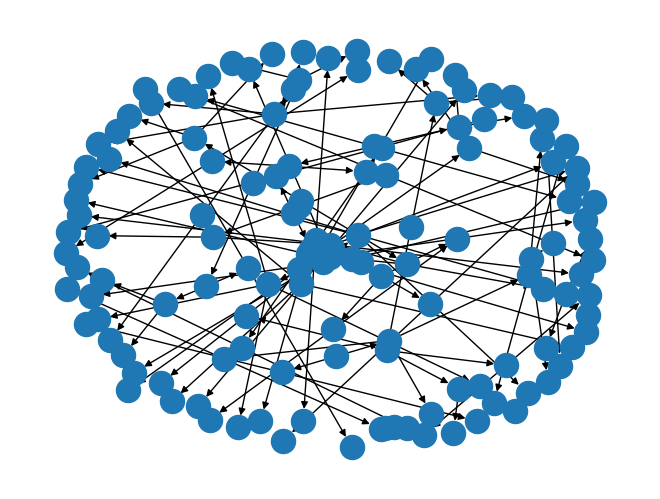

In [15]:
import matplotlib.pyplot as plt
import networkx as nx

pos = nx.spring_layout(model.graph)   # or use LNN’s layout: viz.get_pos(model)
nx.draw(model.graph, pos, with_labels=False, node_size=300)
plt.show()

In [17]:
inference = [auth_bypass.state(), union_based_sqli.state(), error_based_sqli.state(),boolean_blind_sqli.state(),reflected_xss.state(), stored_xss.state(), dom_xss.state(), blind_xss.state(), polyglot_xss.state()]

### Model Decomposed to Specialization

In [18]:
polyglot_model = Model()
polyglot_model.name = "Polyglot XSS Model"
# Decompose: polyglot_xss_payloads
polyglot_xss_payloads = Or(
    polyglot_universal_payload(x),
    polyglot_context_payload(x)
)

# Decompose: polyglot_context_breaks
polyglot_context_breaks = Or(
    html_context_break(x),
    js_context_break(x),
    css_context_break(x)
)

# Decompose: polyglot_xss_success
polyglot_xss_success = And(
    status_200_polyglot(x),
    Or(polyglot_context_breaks, multi_context_executed(x))
)

# Decompose: polyglot_xss_fail
polyglot_xss_fail = And(
    status_400_polyglot(x),
    invalid_char_msg(x)
)

# Final rule: polyglot_xss
polyglot_xss = And(
    polyglot_xss_payloads,
    Or(polyglot_xss_success, polyglot_xss_fail, all_contexts_vulnerable(x))
)

polyglot_model.add_knowledge(polyglot_xss)

In [19]:
blind_model = Model()
blind_model.name = "Blind XSS Model"
# Decompose: blind_xss_payloads
blind_xss_payloads = Or(
    blind_oob_payload(x),
    blind_delayed_payload(x)
)

# Decompose: blind_xss_success
blind_xss_success = And(
    status_blind_ok(x),
    Or(dns_lookup_detected(x), http_request_logged(x))
)

# Decompose: blind_xss_fail
blind_xss_fail = And(
    status_blind_no_oob(x),
    oob_absent(x)
)

# Decompose: blind_xss_verification
blind_xss_verification = Or(
    callback_received(x),
    data_leak_observed(x)
)

# Final rule: blind_xss
blind_xss = And(
    blind_xss_payloads,
    Or(blind_xss_success, blind_xss_fail, blind_xss_verification)
)

blind_model.add_knowledge(blind_xss)

In [20]:
dom_xss_model = Model()
dom_xss_model.name = "DOM XSS Model"
# Decompose: dom_xss_payloads
dom_xss_payloads = Or(
    dom_fragment_payload(x),
    dom_js_context_payload(x)
)

# Decompose: dom_xss_success
dom_xss_success = And(
    status_200_dom(x),
    And(dom_sinks_used(x), no_sanitization(x))
)

# Decompose: dom_xss_fail
dom_xss_fail = safe_dom_constructs(x)

# Decompose: dom_xss_verification
dom_xss_verification = And(
    url_fragment_executed(x),
    no_js_errors(x)
)

# Final rule: dom_xss
dom_xss = And(
    dom_xss_payloads,
    Or(dom_xss_success, dom_xss_fail, dom_xss_verification)
)

dom_xss_model.add_knowledge(dom_xss)

In [21]:
stored_xss_model = Model()
stored_xss_model.name = "Stored XSS Model"
# Decompose: stored_xss_payloads
stored_xss_payloads = Or(
    stored_payload(x),
    session_hijack_payload(x)
)

# Decompose: stored_xss_success
stored_xss_success = And(
    status_ok_or_redirect(x),
    Or(payload_reflected(x), persistence_marker_found(x))
)

# Decompose: stored_xss_fail
stored_xss_fail = Or(
    status_blocked_stored(x),
    body_reject_msg(x)
)

# Decompose: stored_xss_verification
stored_xss_verification = Or(
    browser_alert(x),
    outbound_to_attacker(x)
)

# Final rule: stored_xss
stored_xss = And(
    stored_xss_payloads,
    Or(stored_xss_success, stored_xss_fail, stored_xss_verification)
)

stored_xss_model.add_knowledge(stored_xss)

In [22]:
reflected_xss_model = Model()  
reflected_xss_model.name = "Reflected XSS Model" 
# Decompose: xss_payloads
xss_payloads = Or(
    xss_basic_payload(x),
    xss_obfuscated_payload(x),
    xss_context_payload(x)
)

# Decompose: success_body_signals
success_body_signals = Or(
    body_exact_match(x),
    body_no_encoding(x)
)

# Decompose: success_response_indicators
success_response_indicators = Or(
    success_body_signals,
    html_content_type(x),
    size_delta_detected(x)
)

# Decompose: reflected_xss_success
reflected_xss_success = And(
    status_200_xss(x),
    success_response_indicators
)

# Decompose: reflected_xss_fail
reflected_xss_fail = Or(
    status_blocked_xss(x),
    body_encoded_xss(x),
    body_filtered_xss(x)
)

# Decompose: browser_verification
browser_verification = Or(
    browser_alert_popup(x),
    dom_modified(x)
)

# Final rule: reflected_xss
reflected_xss = And(
    xss_payloads,
    Or(reflected_xss_success, reflected_xss_fail, browser_verification)
)

reflected_xss_model.add_knowledge(reflected_xss)


In [23]:
boolean_blind_sqli_model = Model()
boolean_blind_sqli_model.name = "Boolean Blind SQL Injection Model"
# Decompose: payload_triggered_boolean
payload_triggered_boolean = Or(
    bool_content_payload(x),
    bool_length_payload(x)
)

# Decompose: content_diff
content_diff = Or(
    true_pattern_found(x),
    false_pattern_found(x)
)

# Decompose: size_diff
size_diff = Or(
    true_condition_size(x),
    false_condition_size(x)
)

# Final rule: boolean_blind_sqli
boolean_blind_sqli = And(
    payload_triggered_boolean,
    Or(size_diff, content_diff)
)

boolean_blind_sqli_model.add_knowledge(boolean_blind_sqli)


In [24]:
error_based_sqli_model = Model() 
error_based_sqli_model.name = "error_based_sqli_model"
db_error_signals = Or(
    db_error_mysql(x),
    db_error_mssql(x),
    db_error_pgsql(x)
)

# Decompose: error_content_found
error_content_found = Or(
    db_error_signals,
    data_leaked(x)
)

# Decompose: error_success
error_success = And(
    status_500(x),
    error_content_found
)


# Final rule: error_based_sqli
error_based_sqli = And(
    db_error_signals, 
    error_content_found,
    error_success  
)
error_based_sqli_model.add_knowledge(error_based_sqli)

In [25]:
sqli_model = Model()
sqli_model.name = "SQL Injection Model"
indicator_payload = Or(
    basic_payload(x),
    bool_payload(x),
    concat_payload(x),
    encoded_payload(x)
)

# Decompose: database_error
database_error = And(status_5xx(x), db_error_body(x))

# Decompose: success_login
success_login = Or(
    status_3xx(x),
    status_2xx(x),
    session_cookie_set(x),
    success_body(x),
    database_error
)

# Decompose: failure
failure = Or(
    And(status_2xx(x), fail_body(x)),
    status_4xx(x),
    no_session_cookie(x)
)

# Decompose: not_failure
not_failure = Not(failure)

auth_bypass = And(
    indicator_payload,
    success_login,
    not_failure
)

sqli_model.add_knowledge(auth_bypass)

In [26]:
# Decompose: payload_triggered
payload_triggered = Or(
    order_by_payload(x),
    union_payload(x)
)

# Decompose: content_change
content_change = Or(
    response_size_changed(x),
    db_strings_found(x),
    position_marker_found(x)
)

# Decompose: response_success
response_success = And(
    status_200(x),
    content_change
)

# Decompose: response_fail
response_fail = Or(
    sql_error(x),
    order_by_error(x)
)

union_based_sqli = And(
    payload_triggered,
    Or(response_success, response_fail)
)

sqli_model.add_knowledge(union_based_sqli)


In [ ]:
# # saving models as a .pkl into a given directory
# import pickle

# def save_model(model, filename):
#     with open(filename, 'wb') as f:
#         pickle.dump(model, f)

In [28]:
models = [sqli_model, polyglot_model, blind_model, dom_xss_model, stored_xss_model, reflected_xss_model, boolean_blind_sqli_model, error_based_sqli_model]

### Training ...


In [53]:
auth_instance = {
    basic_payload: {'auth1': Fact.TRUE},
    status_2xx: {'auth1': Fact.TRUE},
    session_cookie_set: {'auth1': Fact.TRUE},
    success_body: {'auth1': Fact.TRUE},
    status_5xx: {'auth1': Fact.FALSE},
    db_error_body: {'auth1': Fact.FALSE},
    status_4xx: {'auth1': Fact.FALSE},
    fail_body: {'auth1': Fact.FALSE},
    no_session_cookie: {'auth1': Fact.FALSE},
}

auth_bypass_instance_label = {
    auth_bypass:{'auth1': Fact.TRUE}
}  

# --- SQL Injection (70 samples) ---
# Union-based SQLi
union_instance = {
    union_payload: {'sqli1': Fact.TRUE},
    status_200: {'sqli1': Fact.TRUE},
    response_size_changed: {'sqli1': Fact.TRUE},
    db_strings_found: {'sqli1': Fact.TRUE},
    position_marker_found: {'sqli1': Fact.TRUE},
    sql_error: {'sqli1': Fact.FALSE},
    order_by_error: {'sqli1': Fact.FALSE},
}

union_instance_label = {
    union_based_sqli:{'sqli1': Fact.TRUE}
}
# Error-based SQLi
error_based_instance =  {
    status_500: {'err1': Fact.TRUE},  
db_error_pgsql: {'err1': Fact.TRUE},  
data_leaked: {'err1': Fact.TRUE},  
}

error_based_instance_label = {
    error_based_sqli: {
        'err1': Fact.TRUE
    }
}

# Boolean-blind SQLi
boolean_blind_instance = {
    bool_content_payload: {'bool1': Fact.TRUE},
    true_condition_size: {'bool1': Fact.TRUE},
    false_condition_size: {'bool1': Fact.FALSE},
    true_pattern_found: {'bool1': Fact.TRUE},
    false_pattern_found: {'bool1': Fact.FALSE},
}

boolean_blind_instance_label = {
    boolean_blind_sqli: {
        'bool1': Fact.TRUE
    }
}

# --- XSS (70 samples) ---
# Reflected XSS
reflected_xss_instance = {
    xss_basic_payload: {'rxss1': Fact.TRUE},
    status_200_xss: {'rxss1': Fact.TRUE},
    body_exact_match: {'rxss1': Fact.TRUE},
    html_content_type: {'rxss1': Fact.TRUE},
    size_delta_detected: {'rxss1': Fact.TRUE},
    body_encoded_xss: {'rxss1': Fact.FALSE},
    body_filtered_xss: {'rxss1': Fact.FALSE},
    status_blocked_xss: {'rxss1': Fact.FALSE},
    browser_alert_popup: {'rxss1': Fact.TRUE},
    dom_modified: {'rxss1': Fact.TRUE},
}

reflected_xss_instance_label = {
    reflected_xss: {
        'rxss1': Fact.TRUE
    }
}

# Stored XSS
stored_xss_instance =  {
    stored_payload: {'sxss1': Fact.TRUE},
    status_ok_or_redirect: {'sxss1': Fact.TRUE},
    payload_reflected: {'sxss1': Fact.TRUE},
    persistence_marker_found: {'sxss1': Fact.TRUE},
    browser_alert: {'sxss1': Fact.TRUE},
    outbound_to_attacker: {'sxss1': Fact.TRUE},
    status_blocked_stored: {'sxss1': Fact.FALSE},
    body_reject_msg: {'sxss1': Fact.FALSE},
}

stored_xss_instance_label = {
    stored_xss: {
        'sxss1': Fact.TRUE
    }
}

# DOM XSS
dom_xss_instance =  {
    dom_fragment_payload: {'dxss1': Fact.TRUE},
    dom_sinks_used: {'dxss1': Fact.TRUE},
    no_sanitization: {'dxss1': Fact.TRUE},
    status_200_dom: {'dxss1': Fact.TRUE},
    safe_dom_constructs: {'dxss1': Fact.FALSE},
    url_fragment_executed: {'dxss1': Fact.TRUE},
    no_js_errors: {'dxss1': Fact.TRUE},
}

dom_xss_instance_label = {
    dom_xss: {
        'dxss1': Fact.TRUE
    }
}

# Blind XSS
blind_xss_instance = {
    blind_oob_payload: {'bxss1': Fact.TRUE},
    status_blind_ok: {'bxss1': Fact.TRUE},
    dns_lookup_detected: {'bxss1': Fact.TRUE},
    http_request_logged: {'bxss1': Fact.TRUE},
    callback_received: {'bxss1': Fact.TRUE},
    data_leak_observed: {'bxss1': Fact.TRUE},
    status_blind_no_oob: {'bxss1': Fact.FALSE},
    oob_absent: {'bxss1': Fact.FALSE},
}

blind_xss_instance_label = {
    blind_xss: {
        'bxss1': Fact.TRUE
    }
}

# Polyglot XSS
polyglot_xss_instance = {
    polyglot_universal_payload: {'pgx1': Fact.TRUE},
    status_200_polyglot: {'pgx1': Fact.TRUE},
    html_context_break: {'pgx1': Fact.TRUE},
    js_context_break: {'pgx1': Fact.TRUE},
    css_context_break: {'pgx1': Fact.TRUE},
    multi_context_executed: {'pgx1': Fact.TRUE},
    status_400_polyglot: {'pgx1': Fact.FALSE},
    invalid_char_msg: {'pgx1': Fact.FALSE},
    all_contexts_vulnerable: {'pgx1': Fact.TRUE},
}

polyglot_xss_instance_label = {
    polyglot_xss: {
        'pgx1': Fact.TRUE
    }
}

In [34]:
sqli_model.add_data(
    auth_instance
)

In [35]:
sqli_model.add_data(
    union_instance
)

In [39]:
sqli_model.add_labels(
    auth_bypass_instance_label,
)

In [44]:
sqli_model.add_labels(
    union_instance_label
)

In [47]:
losses = [Loss.SUPERVISED, Loss.CONTRADICTION]

sqli_model.train(losses=losses,
            learning_rate=0.01,
            epochs=100,
            pbar=True,
            stop_at_convergence=True)

training epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Infering 


/home/kalki/Works/Capstone/LNN/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
training epoch:   0%|          | 0/100 [00:00<?, ?it/s]


Infering 


(([0.0], [[0.0, 0.0]]), [13.0])

In [50]:
error_based_sqli_model.add_data(error_based_instance)

In [54]:
error_based_sqli_model.add_labels(error_based_instance_label)

In [55]:
error_based_sqli_model.train(losses=losses,
            learning_rate=0.01,
            epochs=100,
            pbar=True,
            stop_at_convergence=True)

training epoch:   0%|          | 0/100 [00:00<?, ?it/s]/home/kalki/Works/Capstone/LNN/.venv/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([2])) that is different to the input size (torch.Size([1, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
training epoch:   0%|          | 0/100 [00:00<?, ?it/s]


Infering 
Infering 


(([0.0], [[0.0, 0.0]]), [0.0])

### Utility Functions